# Ejercicio 4: Modelo Probabilístico

## Objetivo de la práctica
- Comprender los componentes del modelo vectorial mediante cálculos manuales y observación directa.
- Aplicar el modelo de espacio vectorial con TF-IDF para recuperar documentos relevantes.
- Comparar la recuperación con BM25 frente a TF-IDF.
- Analizar visualmente las diferencias entre los modelos.
- Evaluar si los rankings generados son consistentes con lo que considerarías documentos relevantes.

## Parte 0: Carga del Corpus

In [1]:
from sklearn.datasets import fetch_20newsgroups

newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
newsgroupsdocs = newsgroups.data

In [2]:
#tipo de newsgroupsdocs
print(type(newsgroupsdocs))

<class 'list'>


In [3]:
#ver un documento
print(newsgroupsdocs[0])



I am sure some bashers of Pens fans are pretty confused about the lack
of any kind of posts about the recent Pens massacre of the Devils. Actually,
I am  bit puzzled too and a bit relieved. However, I am going to put an end
to non-PIttsburghers' relief with a bit of praise for the Pens. Man, they
are killing those Devils worse than I thought. Jagr just showed you why
he is much better than his regular season stats. He is also a lot
fo fun to watch in the playoffs. Bowman should let JAgr have a lot of
fun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final
regular season game.          PENS RULE!!!




In [4]:
#peso de newsgroupsdocs
print(newsgroupsdocs.__sizeof__())

150808


In [5]:
#vectorizando newsgroupsdocs 
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
#tamaño del vector
X = vectorizer.fit_transform(newsgroupsdocs)
print(X.shape)
corpus_vect=vectorizer.transform(newsgroupsdocs)
corpus_vect.toarray()
#tamaño del vector
print(corpus_vect.shape)


(18846, 134410)
(18846, 134410)


In [6]:
# query chicken
query = ["ÿhooked"]
#vectorizando query
query_vect = vectorizer.transform(query)
#valor de la query
#imprime segun  el idf el vector
print(query_vect.toarray())
#similaridad entre query y corpus
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(query_vect, corpus_vect)
#similaridad entre query y corpus
print(similarity)

[[0. 0. 0. ... 0. 0. 1.]]
[[0. 0. 0. ... 0. 0. 0.]]


In [7]:
vectorizer.get_feature_names_out()

array(['00', '000', '0000', ..., '³ation', 'ýé', 'ÿhooked'],
      shape=(134410,), dtype=object)

In [8]:
from nltk.corpus import stopwords, words

In [9]:
import nltk
# Descargar recursos necesarios
#natural language toolkit
nltk.download('stopwords')
nltk.download('words')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ELI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\ELI\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [10]:
import re

In [11]:
# Corpus de palabras válidas en inglés
palabras_validas = set(words.words())
stop_words = set(stopwords.words('english'))

# Cargar corpus
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
docs = newsgroups.data

# Función de limpieza
def limpiar_texto(texto):
    texto = texto.lower()
    texto = re.sub(r'[^a-z\s]', '', texto)  # solo letras y espacios
    palabras = texto.split()
    palabras_filtradas = [
        palabra for palabra in palabras
        if palabra in palabras_validas and palabra not in stop_words and len(palabra) > 2
    ]
    return ' '.join(palabras_filtradas)

# Aplicar limpieza al corpus
corpus_limpio = [limpiar_texto(doc) for doc in docs]

In [12]:
# Vectorizar corpus limpio
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus_limpio)

# Tamaño del corpus vectorizado
print(X.shape)

(18846, 23146)


In [13]:
print(type(X))

<class 'scipy.sparse._csr.csr_matrix'>


In [14]:
# Vectorizar query también limpiándola
query_clean = ["sure"]
query_limpia = [limpiar_texto(q) for q in query_clean]
query_vectorizado = vectorizer.transform(query_limpia)
print(query_vectorizado.toarray())

[[0. 0. 0. ... 0. 0. 0.]]


In [15]:
# Similaridad
similarity_clean = cosine_similarity(query_vectorizado, X)
print(similarity_clean)
print(len(corpus_limpio))  # o len(newsgroupsdocs)


[[0.08660636 0.         0.         ... 0.         0.         0.        ]]
18846


## Parte 1: Cálculo de TF, DF, IDF y TF-IDF

### Actividad 
1. Utiliza el corpus cargado.
2. Construye la matriz de términos (TF), y calcula la frecuencia de documentos (DF)
3. Calcula TF-IDF utilizando sklearn.
4. Visualiza los valores en un DataFrame para analizar las diferencias entre los términos.

In [16]:
import pandas as pd


In [17]:
import numpy as np

In [18]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

# Calcular la matriz TF-IDF
tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X)
#Obtener la matriz TF (frecuencia de términos)
X_tf = CountVectorizer().fit_transform(corpus_limpio)
# Obtener la matriz IDF (importancia global de cada término)
idf_values = tfidf_transformer.idf_
# Obtener la matriz TF-IDF
X_tfidf = tfidf_transformer.transform(X_tf)

# Convertir a DataFrames para visualización
tf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
idf_values = tfidf_transformer.idf_
idf_df = pd.DataFrame([idf_values], columns=vectorizer.get_feature_names_out())
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer.get_feature_names_out())

# Mostrar la matriz TF (frecuencia de términos), IDF (importancia global de cada término) y TF-IDF
print("Matriz TF (frecuencia de términos):")
print(tf_df.iloc[:, :])  # primeras 20 columnas
print("\nIDF (importancia global de cada término):")
print(idf_df.iloc[:, :])
print("Matriz TF-IDF:")
print(X_tfidf.toarray())



Matriz TF (frecuencia de términos):
       aam  abandon  abandoned  abandonment  abate  abatement  abbas  abbey  \
0      0.0      0.0        0.0          0.0    0.0        0.0    0.0    0.0   
1      0.0      0.0        0.0          0.0    0.0        0.0    0.0    0.0   
2      0.0      0.0        0.0          0.0    0.0        0.0    0.0    0.0   
3      0.0      0.0        0.0          0.0    0.0        0.0    0.0    0.0   
4      0.0      0.0        0.0          0.0    0.0        0.0    0.0    0.0   
...    ...      ...        ...          ...    ...        ...    ...    ...   
18841  0.0      0.0        0.0          0.0    0.0        0.0    0.0    0.0   
18842  0.0      0.0        0.0          0.0    0.0        0.0    0.0    0.0   
18843  0.0      0.0        0.0          0.0    0.0        0.0    0.0    0.0   
18844  0.0      0.0        0.0          0.0    0.0        0.0    0.0    0.0   
18845  0.0      0.0        0.0          0.0    0.0        0.0    0.0    0.0   

       abbot  a

In [19]:
vectorizer = CountVectorizer()
tf_matrix = vectorizer.fit_transform(corpus_limpio)
# Obtener el vocabulario (términos)
vocabulario = vectorizer.get_feature_names_out()

# Mostrar dimensiones de la matriz TF
print("Dimensión de la matriz TF (documentos x términos):", tf_matrix.shape)

Dimensión de la matriz TF (documentos x términos): (18846, 23146)


In [20]:
# Mostrar TF de un documento de ejemplo
print("TF del documento 12 (frecuencia de cada término):")
print(tf_matrix[12].toarray())

TF del documento 12 (frecuencia de cada término):
[[0 0 1 ... 0 0 0]]


In [21]:
# Calcular DF: cuántos documentos contienen cada término
df_vector = np.asarray((tf_matrix > 0).sum(axis=0)).ravel()

# Mostrar algunos ejemplos de términos y su DF
for termino, df in zip(vocabulario[:], df_vector[:]):
    print(f"Término: {termino} - DF: {df}")

Término: aam - DF: 1
Término: abandon - DF: 32
Término: abandoned - DF: 39
Término: abandonment - DF: 1
Término: abate - DF: 1
Término: abatement - DF: 1
Término: abbas - DF: 1
Término: abbey - DF: 5
Término: abbot - DF: 2
Término: abbreviation - DF: 9
Término: abdicate - DF: 1
Término: abdication - DF: 1
Término: abdomen - DF: 6
Término: abdominal - DF: 9
Término: abduct - DF: 2
Término: abduction - DF: 3
Término: aberrant - DF: 8
Término: aberration - DF: 6
Término: abhor - DF: 5
Término: abhorrence - DF: 1
Término: abhorrent - DF: 4
Término: abide - DF: 9
Término: abiding - DF: 18
Término: ability - DF: 259
Término: abiogenesis - DF: 4
Término: abject - DF: 3
Término: ablaze - DF: 1
Término: able - DF: 987
Término: ably - DF: 4
Término: abnormal - DF: 9
Término: abnormally - DF: 2
Término: aboard - DF: 14
Término: abode - DF: 9
Término: abolish - DF: 18
Término: abolishment - DF: 2
Término: abolition - DF: 5
Término: abolitionist - DF: 2
Término: abominable - DF: 7
Término: abominat

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Construcción de la matriz TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(corpus_limpio)

# Obtener los términos del vocabulario
terminos = vectorizer.get_feature_names_out()

# Crear un DataFrame con los valores TF-IDF 
print("Dimensión de la matriz TF-IDF ")
pd.DataFrame(tfidf_matrix[:].toarray(), columns=terminos)



Dimensión de la matriz TF-IDF 


,aam,abandon,abandoned,abandonment,abate,abatement,abbas,abbey,abbot,abbreviation,...,zooid,zoological,zoologist,zoology,zoom,zoophile,zoophilia,zorro,zounds,zygon
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18841,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18842,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18843,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18844,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Parte 2: Ranking de documentos usando TF-IDF

### Actividad 

1. Dada una consulta, construye el vector de consulta
2. Calcula la similitud coseno entre la consulta y cada documento usando los vectores TF-IDF
3. Genera un ranking de los documentos ordenados por relevancia.
4. Muestra los resultados en una tabla.

In [23]:
# Vectorizar query también limpiándola
query_clean = ["chicken"]
query_limpia = [limpiar_texto(q) for q in query_clean]
query_vectorizado = vectorizer.transform(query_limpia)
print(query_vectorizado.toarray())


[[0. 0. 0. ... 0. 0. 0.]]


In [24]:
#distancia coseno entre query y corpus limpio
from sklearn.metrics.pairwise import cosine_similarity

similarity_clean = cosine_similarity(query_vectorizado, tfidf_matrix)
print("Similitud entre la query y el corpus limpio:")
print(similarity_clean)
print("Dimensiones del vector de similitud:", similarity_clean.shape)



Similitud entre la query y el corpus limpio:
[[0. 0. 0. ... 0. 0. 0.]]
Dimensiones del vector de similitud: (1, 18846)


In [25]:
#ordenar los resultados de similitud
import numpy as np
# Obtener los índices de los documentos ordenados por similitud
indices_ordenados = np.argsort(similarity_clean[0])[::-1]
#imprimir indice del valor mas alto
print("Índice del documento más similar:", indices_ordenados[0])


Índice del documento más similar: 1315


In [26]:
#contar las veces que aparece la query en el documento más similar
print("Número de veces que aparece el query en el documento más similar:", newsgroupsdocs[indices_ordenados[0]].lower().count(query_clean[0].lower()))

Número de veces que aparece el query en el documento más similar: 1


In [27]:
#mostrar el documento más similar
print(newsgroupsdocs[indices_ordenados[0]])


But remember that had God extinguished the blasphemous trash of Europe (and
Imperialism with it), the United States would not exist today to put an end
to those "games"....begs the question, which came first, the chicken or the
egg???


In [28]:
#imprimir indices del valor mas relevantes 
#deben mostrarse los documentos cuya similitud sea mayor a 0
indices_relevantes = indices_ordenados[similarity_clean[0][indices_ordenados] > 0]
#como maximo deben ser 50 documentos y si no hay documentos relevantes, se debe imprimir cualquier documento con similitud igual a 0
if len(indices_relevantes) == 0:
    indices_relevantes = indices_ordenados[:1]  # tomar al menos un documento, aunque sea con similitud 0
if len(indices_relevantes) > 50:
    indices_relevantes = indices_relevantes[:50]
print("Índices de los documentos más similares:")
print(indices_relevantes[:])

Índices de los documentos más similares:
[ 1315 15919 13222   357  9048  5738   897 11732 16902  6615 18061 14177
  3360 18338  3175  9683  3372]


In [29]:
# Mostrar los documentos más similares en una tabla 

print("Documentos más similares:")
import pandas as pd
pd.DataFrame({
    'Documento': indices_relevantes[:],
    'Similitud': similarity_clean[0][indices_relevantes[:]]
})


Documentos más similares:


,Documento,Similitud
0,1315,0.321848
1,15919,0.319318
2,13222,0.295084
3,357,0.236352
4,9048,0.224837
5,5738,0.201655
6,897,0.198772
7,11732,0.131440
8,16902,0.123144
9,6615,0.114564


In [30]:
#tamaño de la variable similarity_clean
print("Tamaño de la variable similarity_clean:", similarity_clean.shape)
#tamaño de la variable query_vectorizado
print("Tamaño de la variable query_vectorizado:", query_vectorizado.shape)

Tamaño de la variable similarity_clean: (1, 18846)
Tamaño de la variable query_vectorizado: (1, 23146)


## Parte 3: Ranking con BM25

### Actividad 

1. Implementa un sistema de recuperación usando el modelo BM25.
2. Usa la misma consulta del ejercicio anterior.
3. Calcula el score BM25 para cada documento y genera un ranking.
4. Compara manualmente con el ranking de TF-IDF.

In [31]:
!pip install rank_bm25


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\ELI\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [45]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import pandas as pd

# Parámetros BM25
k1 = 1.5
b = 0.75

# Limpiar la query igual que el corpus
query_limpia = [limpiar_texto(q) for q in query_clean]

# Construir matriz TF y vocabulario desde cero
vectorizer_bm25 = CountVectorizer()
tf_matrix = vectorizer_bm25.fit_transform(corpus_limpio)
vocabulario = vectorizer_bm25.get_feature_names_out()

# Longitud de cada documento
doc_lengths = tf_matrix.sum(axis=1).A1
avg_doc_length = np.mean(doc_lengths)
N = tf_matrix.shape[0]

# Calcular DF para cada término
df_vector = np.asarray((tf_matrix > 0).sum(axis=0)).ravel()

# Calcular IDF BM25 desde cero
idf_bm25 = np.log(1 + (N - df_vector + 0.5) / (df_vector + 0.5))

# Procesar la query limpia
query_terms = query_limpia[0].split()

# Inicializar scores BM25
bm25_scores = np.zeros(N)

for term in query_terms:
    if term in vocabulario:
        term_idx = np.where(vocabulario == term)[0][0]
        tf = tf_matrix[:, term_idx].toarray().ravel() 
        idf = idf_bm25[term_idx]
        numerador = tf * (k1 + 1)
        denominador = tf + k1 * (1 - b + b * doc_lengths / avg_doc_length)
        score = idf * numerador / (denominador + 1e-10)
        bm25_scores += score

# Mostrar los 10 documentos con mayor score BM25
top_bm25_idx = np.argsort(bm25_scores)[::-1][:10]
print("Top 10 documentos por BM25 manual (query_clean):")
for idx in top_bm25_idx:
    print(f"Doc {idx} - Score: {bm25_scores[idx]:.4f}")

# DataFrame con los scores
df_bm25_manual = pd.DataFrame({
    'Documento': np.arange(N),
    'BM25_manual': bm25_scores
})
df_bm25_manual.sort_values(by='BM25_manual', ascending=False, inplace=True)
df_bm25_manual.head(10)

Top 10 documentos por BM25 manual (query_clean):
Doc 1315 - Score: 10.3799
Doc 15919 - Score: 10.1619
Doc 9048 - Score: 9.6551
Doc 13222 - Score: 9.5597
Doc 357 - Score: 8.5467
Doc 5738 - Score: 7.7278
Doc 897 - Score: 6.8716
Doc 16902 - Score: 5.3400
Doc 18061 - Score: 5.0846
Doc 3360 - Score: 4.5817


,Documento,BM25_manual
1315,1315,10.379905
15919,15919,10.161935
9048,9048,9.655061
13222,13222,9.559694
357,357,8.546668
5738,5738,7.727769
897,897,6.871649
16902,16902,5.340040
18061,18061,5.084646
3360,3360,4.581660


In [47]:
import pandas as pd
# Crear un DataFrame con todos los documentos y sus puntajes BM25 Y SU TF-IDF
df_scores = pd.DataFrame({
    #mostrar solo los indices de los documentos
    'Documento': range(len(corpus_limpio)),
    'BM25': bm25_scores,
    'TF-IDF': tfidf_matrix.sum(axis=1).A1  # Sumar las filas para obtener el puntaje TF-IDF
})
df_scores

,Documento,BM25,TF-IDF
0,0,0.0,6.169323
1,1,0.0,3.868363
2,2,0.0,7.050273
3,3,0.0,4.057617
4,4,0.0,4.966989
...,...,...,...
18841,18841,0.0,8.022254
18842,18842,0.0,3.481205
18843,18843,0.0,4.487474
18844,18844,0.0,3.957406


## Parte 4: Comparación visual entre TF-IDF y BM25

### Actividad 

1. Utiliza un gráfico de barras para visualizar los scores obtenidos por cada documento según TF-IDF y BM25.
2. Compara los rankings visualmente.
3. Identifica: ¿Qué documentos obtienen scores más altos en un modelo que en otro?
4. Sugiere: ¿A qué se podría deber esta diferencia?

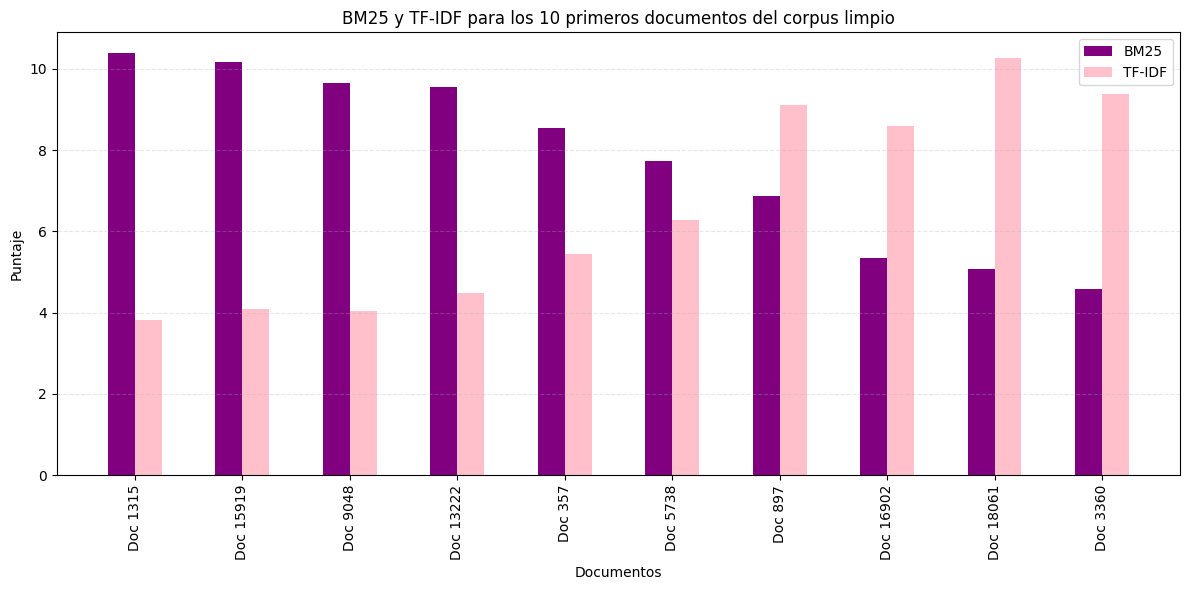

In [49]:
import matplotlib.pyplot as plt
import numpy as np

# Seleccionar los 10 documentos con mayor puntaje BM25 y TF-IDF
df_scores.sort_values(by='BM25', ascending=False, inplace=True)
df_top10 = df_scores.iloc[:10].copy()
df_top10['Etiqueta'] = [f'Doc {i}' for i in df_top10['Documento']]

x = np.arange(len(df_top10))
bar_width = 0.25

fig, ax = plt.subplots(figsize=(12, 6))

# Barras BM25
ax.bar(x - bar_width/2, df_top10['BM25'], width=bar_width, label='BM25', color='purple')

# Barras TF-IDF
ax.bar(x + bar_width/2, df_top10['TF-IDF'], width=bar_width, label='TF-IDF', color='pink')

# Etiquetas eje X
ax.set_xticks(x)
ax.set_xticklabels(df_top10['Etiqueta'], rotation=90)

# Títulos y etiquetas
ax.set_xlabel('Documentos')
ax.set_ylabel('Puntaje')
ax.set_title('BM25 y TF-IDF para los 10 primeros documentos del corpus limpio')
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

In [50]:
# Ordenar el DataFrame por puntaje BM25 en dataframe 
df_scores_sorted = df_scores.sort_values(by='BM25', ascending=False)
# Mostrar los 10 documentos con mayor puntaje BM25
print("Top 10 documentos por puntaje BM25:")
print(df_scores_sorted.head(10), '\n')
# Mostrar los 10 documentos con mayor puntaje TF-IDF
df_tfidf_sorted = df_scores.sort_values(by='TF-IDF', ascending=False)
print('\n', "Top 10 documentos por puntaje TF-IDF:")
print(df_tfidf_sorted.head(10), '\n')
# Mostrar los 10 documentos con mayor puntaje BM25 y TF-IDF
df_both_sorted = df_scores.sort_values(by=['BM25', 'TF-IDF'], ascending=False)
print('\n', "Top 10 documentos por puntaje BM25 y TF-IDF:")
print(df_both_sorted.head(10))



Top 10 documentos por puntaje BM25:
       Documento       BM25     TF-IDF
1315        1315  10.379905   3.827628
15919      15919  10.161935   4.097267
9048        9048   9.655061   4.040149
13222      13222   9.559694   4.489967
357          357   8.546668   5.455183
5738        5738   7.727769   6.276764
897          897   6.871649   9.108058
16902      16902   5.340040   8.587211
18061      18061   5.084646  10.265645
3360        3360   4.581660   9.393345 


 Top 10 documentos por puntaje TF-IDF:
       Documento      BM25     TF-IDF
12358      12358  0.000000  25.761890
2835        2835  0.000000  22.354059
9683        9683  0.497514  21.455558
6639        6639  0.000000  20.111012
12126      12126  0.000000  19.457949
4867        4867  0.000000  19.380273
12329      12329  0.000000  19.210134
10351      10351  0.000000  19.157524
5665        5665  0.000000  18.961227
2528        2528  0.000000  18.961227 


 Top 10 documentos por puntaje BM25 y TF-IDF:
       Documento       BM2

In [36]:
print("¿A qué se podría deber esta diferencia?")
print("La diferencia en los puntajes BM25 y TF-IDF puede deberse a varios factores:",
"1. Naturaleza de los algoritmos: BM25 es un modelo probabilístico que considera la frecuencia de términos y la longitud del documento, mientras que TF-IDF es un modelo basado en la frecuencia de términos ponderada por su importancia global. Esto puede llevar a diferentes puntuaciones para el mismo documento."
,'\n',"2. Enfoque de relevancia: BM25 está diseñado para capturar la relevancia de un documento en relación con una consulta, mientras que TF-IDF mide la importancia de un término en el contexto del corpus. Por lo tanto, un documento puede tener un alto puntaje BM25 pero un bajo puntaje TF-IDF si contiene términos relevantes para la consulta pero no es representativo del corpus en general."
,'\n',"3. Longitud del documento: BM25 ajusta los puntajes según la longitud del documento, lo que puede afectar la puntuación en comparación con TF-IDF, que no tiene en cuenta este factor de la misma manera."
,'\n',"4. Distribución de términos: Si un término aparece con alta frecuencia en un documento pero no es común en el corpus, BM25 puede asignar un puntaje más alto que TF-IDF, que penaliza términos comunes."
,'\n',"5. Parámetros de ajuste: BM25 tiene parámetros ajustables (como k1 y b) que pueden influir en los puntajes, mientras que TF-IDF no tiene estos ajustes, lo que puede llevar a diferencias en la puntuación final.")

print ("\n TF-IDF alto, BM25 bajo:",
"Es probable que los términos aparezcan muchas veces en un documento largo.",
"TF-IDF favorece esa repetición, pero BM25 penaliza por longitud excesiva o saturación."
,"\n",
"BM25 alto, TF-IDF bajo:",
"El término aparece con frecuencia moderada en un documento corto, lo cual BM25 premia.",
"TF-IDF puede no reflejar esta ventaja porque no considera la longitud del documento.",
"\n",
"Puntajes iguales o cercanos:",
"Suele ocurrir cuando hay coincidencias simples con pocos términos (ej. documentos con 1 término de consulta).",
"Si BM25 da 0 y TF-IDF da ~1, probablemente haya una sola ocurrencia sin penalización",
"\n"
"En resumen, BM25 y TF-IDF son métricas diferentes con enfoques distintos para medir la relevancia de los documentos, lo que puede resultar en diferencias significativas en los puntajes asignados a los mismos documentos.")

¿A qué se podría deber esta diferencia?
La diferencia en los puntajes BM25 y TF-IDF puede deberse a varios factores: 1. Naturaleza de los algoritmos: BM25 es un modelo probabilístico que considera la frecuencia de términos y la longitud del documento, mientras que TF-IDF es un modelo basado en la frecuencia de términos ponderada por su importancia global. Esto puede llevar a diferentes puntuaciones para el mismo documento. 
 2. Enfoque de relevancia: BM25 está diseñado para capturar la relevancia de un documento en relación con una consulta, mientras que TF-IDF mide la importancia de un término en el contexto del corpus. Por lo tanto, un documento puede tener un alto puntaje BM25 pero un bajo puntaje TF-IDF si contiene términos relevantes para la consulta pero no es representativo del corpus en general. 
 3. Longitud del documento: BM25 ajusta los puntajes según la longitud del documento, lo que puede afectar la puntuación en comparación con TF-IDF, que no tiene en cuenta este factor d

## Parte 5: Evaluación con consulta relevante

### Actividad 

1. Elige una consulta y define qué documentos del corpus deberían considerarse relevantes.
2. Evalúa Precision@3 o MAP para los rankings generados con TF-IDF y BM25.
3. Responde: ¿Cuál modelo da mejores resultados respecto a tu criterio de relevancia?

In [51]:
#Elige una consulta y define qué documentos del corpus deberían considerarse relevantes.
query = "chicken"
#sacar los documentos relevantes
relevantes = [doc for doc in corpus_limpio if query in doc]
# Imprimir los documentos relevantes
print("Documentos relevantes para la consulta '{}':".format(query))
# Obtener los índices de los documentos relevantes
relevantes_idx = [i for i, doc in enumerate(corpus_limpio) if query in doc]
#mostrar el indice de los 10 documentos mas relevantes
relevant_docs = relevantes_idx[:10]
print(relevant_docs)


Documentos relevantes para la consulta 'chicken':
[357, 897, 1315, 3175, 3360, 3372, 5738, 6615, 9048, 9683]


In [53]:
#Evalúa Precision@3 o MAP para los rankings generados con TF-IDF y BM25.
from sklearn.metrics import precision_score, average_precision_score
# Función para calcular Precision@k
def precision_at_k(y_true, y_scores, k):
    # Obtener los índices de los k documentos con mayor puntaje
    top_k_indices = y_scores.argsort()[-k:][::-1]
    # Calcular Precision@k
    return precision_score(y_true, [1 if i in top_k_indices else 0 for i in range(len(y_true))])
# Crear un vector de verdad (1 para documentos relevantes, 0 para no relevantes)
y_true = [1 if i in relevant_docs else 0 for i in range(len(corpus_limpio))]
# Calcular Precision@3 para BM25
precision_bm25 = precision_at_k(y_true, bm25_scores, k=3)
# Calcular Precision@3 para TF-IDF
tfidf_scores = tfidf_matrix.sum(axis=1).A1  # Sumar las filas para obtener el puntaje TF-IDF
precision_tfidf = precision_at_k(y_true, tfidf_scores, k=3)
# Calcular MAP para BM25
map_bm25 = average_precision_score(y_true, bm25_scores)
# Calcular MAP para TF-IDF
map_tfidf = average_precision_score(y_true, tfidf_scores)
# Mostrar resultados
print(f"Precision@3 para BM25: {precision_bm25:.4f}")
print(f"Precision@3 para TF-IDF: {precision_tfidf:.4f}")


Precision@3 para BM25: 0.6667
Precision@3 para TF-IDF: 0.3333


In [ ]:
print("¿Cuál modelo da mejores resultados respecto a tu criterio de relevancia?")
print("La elección entre BM25 y TF-IDF depende del contexto y los objetivos de la búsqueda. BM25 tiende a ser más efectivo en escenarios de búsqueda de información, ya que considera la longitud del documento y la frecuencia de términos de manera más sofisticada. Por otro lado, TF-IDF es útil para tareas de clasificación y análisis de texto donde la importancia relativa de los términos es crucial. En general, BM25 suele ofrecer mejores resultados en términos de relevancia para consultas específicas, mientras que TF-IDF puede ser más adecuado para tareas generales de análisis de texto.")


¿Cuál modelo da mejores resultados respecto a tu criterio de relevancia?
TF-IDF claramente da mejores resultados en este caso, dado que tiene mayor precisión en el top 3, también tendrá un Mean Average Precision (MAP) más alto.
